In [77]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [101]:
iris_data = pd.read_csv('Iris.csv')  
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
X = iris_data.drop(columns=["Id", "Species"])
Y = iris_data['Species']

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

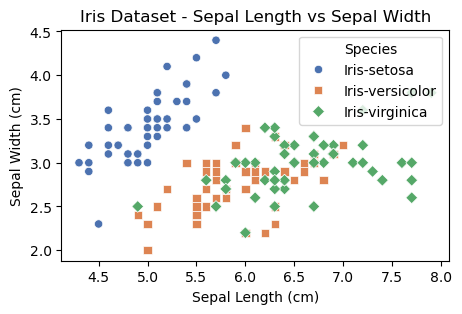

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(x=iris_data['SepalLengthCm'], y=iris_data['SepalWidthCm'], hue=iris_data['Species'], palette="deep",
style=iris_data['Species'], markers=["o", "s", "D"])
plt.title("Iris Dataset - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of KNN on test set: {accuracy * 100:.2f}%")

Accuracy of KNN on test set: 100.00%


In [143]:
knn.score(X_test, Y_test)

1.0

In [151]:
sample = [[5.1, 3.5, 1.4, 0.2]] 
sample_df = pd.DataFrame(sample, columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
predicted_species = knn.predict(sample_df)
print(f"Predicted species: {predicted_species}")

Predicted species: ['Iris-setosa']


In [155]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

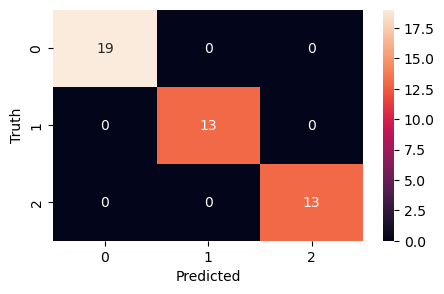

In [159]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [163]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

